In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Parameters for the notebook are found below, read through them.

### Notes:
- If you get errors about 0 size columns and 13 expected size, then one of your measurements errored and you will need to remove a line from the .dat file. 
- Tell me if you get this i'll help to fix, --> a.o.coller@student.rug.nl <--

In [2]:
## ## Parameters
## Hysteresis file first, then the Piezo file.
pathes = ["G1BTO_HysterFile1.dat", "G1BTO_PiezoFile1.dat"] 

## Change this to ~1500 when saving for the last time (saves time while running to debug but change to 1500 to get high res images)
dpi_for_saving = 15

## if you get errors because have no latex in your computer you can make this False
plt.rcParams['text.usetex'] = True

In [3]:
class FerroData:
    def __init__(self, filepath, debug = False, isPiezo = False):
        self.Deligation(filepath, debug,isPiezo)

    def Deligation(self, filepath, debug,isPiezo):
        
        if isPiezo:
            parameters = 57
        else:
            parameters = 43
        
        with open(filepath, "r") as file:
            self.content = file.read()
            self.sections = self.content.split('\n\n')
        self.name, _, self.hardware, *self.measurements = self.sections
        self.hardware = {
            "name": self.hardware.split("\n")[0],
            "data": pd.DataFrame(
                data = np.array([thing.split(":")[1][1:] for thing in self.hardware.split("\n")[1:]]).reshape(1, -1),
                columns = [thing.split(":")[0] for thing in self.hardware.split("\n")[1:]]
            )
        }
        for i in range(len(self.measurements)):
            self.measurements[i] = {
                "name": self.measurements[i].split("\n")[0],
                "parameters": pd.DataFrame(
                    data = np.array([thing.split(":")[1] for thing in self.measurements[i].split("\n")[1:parameters-1]]).reshape(1, -1),
                    columns=[thing.split(":")[0] for thing in self.measurements[i].split("\n")[1:parameters-1]]),
                "data": pd.DataFrame(
                    data = [thing.split("\t")[:-1] for thing in self.measurements[i].split("\n")[parameters+1:parameters+401]],
                    columns=self.measurements[i].split("\n")[parameters].split("\t")[:-1]),
            }
            self.measurements[i]["data"] = self.measurements[i]["data"].apply(pd.to_numeric)

    def Report(self):
        print("Name:", self.name)
        print("Hardware:", self.hardware)
        for i in range(len(self.measurements)):
            print(f"Measurement {i}:", self.measurements[i])

In [4]:
Hysteresisdata = FerroData(pathes[0], debug = True,)
Piezodata = FerroData(pathes[1], debug = True, isPiezo=True)

C:\Users\Ijslo\AppData\Local\Temp\ipykernel_15296\2706119715.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


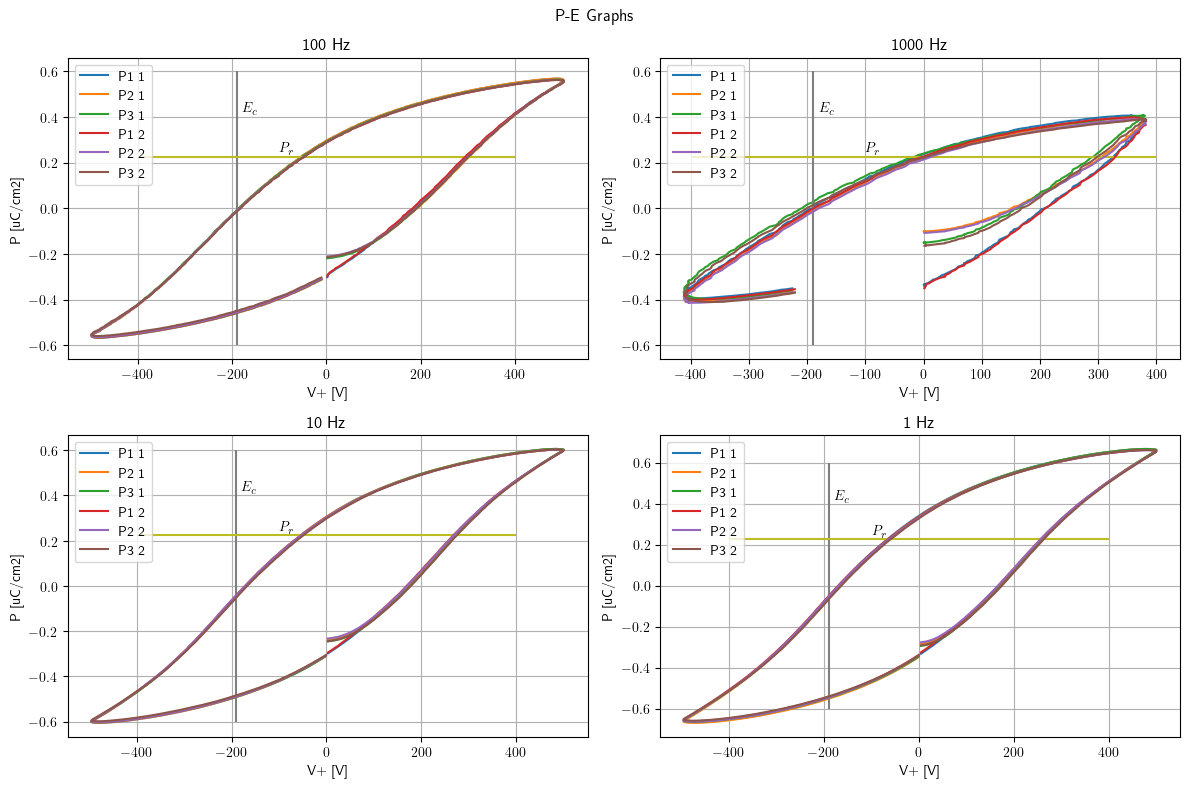

In [5]:
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize = (12,8))

ax = np.array(ax).flatten()
for i in range(len(ax)):
    data = Hysteresisdata.measurements[i]["data"]
    parameters = Hysteresisdata.measurements[i]["parameters"]
    ax[i].plot(data.iloc[:,1],data.iloc[:,4], label = f"{Hysteresisdata.measurements[1]["data"].columns[4].split(" ")[0]} 1")
    ax[i].plot(data.iloc[:,1],data.iloc[:,6], label = f"{Hysteresisdata.measurements[1]["data"].columns[6].split(" ")[0]} 1")
    ax[i].plot(data.iloc[:,1],-data.iloc[:,8], label = f"{Hysteresisdata.measurements[1]["data"].columns[8].split(" ")[0]} 1")
    ax[i].set(title = f"{parameters.iloc[:,11].values[0]} Hz",ylabel = f"{Hysteresisdata.measurements[1]["data"].columns[1]}",xlabel = f"P [uC/cm2]")
    ax[i].vlines(-190,-0.6,0.6, color = "C7")
    ax[i].annotate(r"$E_c$",(-180,0.42))
    
    ax[i].hlines(0.225,-400,400,"C8")
    ax[i].annotate(r"$P_r$",(-100,0.245))
    ax[i].legend()
for i in range(len(ax)):
    data = Piezodata.measurements[i]["data"]
    parameters = Piezodata.measurements[i]["parameters"]
    ax[i].plot(data.iloc[:,1],data.iloc[:,4], label = f"{Piezodata.measurements[1]["data"].columns[4].split(" ")[0]} 2")
    ax[i].plot(data.iloc[:,1],data.iloc[:,6], label = f"{Piezodata.measurements[1]["data"].columns[6].split(" ")[0]} 2")
    ax[i].plot(data.iloc[:,1],-data.iloc[:,8], label = f"{Piezodata.measurements[1]["data"].columns[8].split(" ")[0]} 2")
    ax[i].grid()
    ax[i].set(title = f"{parameters.iloc[:,13].values[0]} Hz",xlabel = f"{Hysteresisdata.measurements[1]["data"].columns[1]}",ylabel = f"P [uC/cm2]")
    ax[i].legend()
fig.suptitle(r"P-E Graphs")
fig.tight_layout()
fig.savefig("P-E Graphs",dpi = dpi_for_saving,bbox_inches='tight')
fig.show()

C:\Users\Ijslo\AppData\Local\Temp\ipykernel_15296\3909451010.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


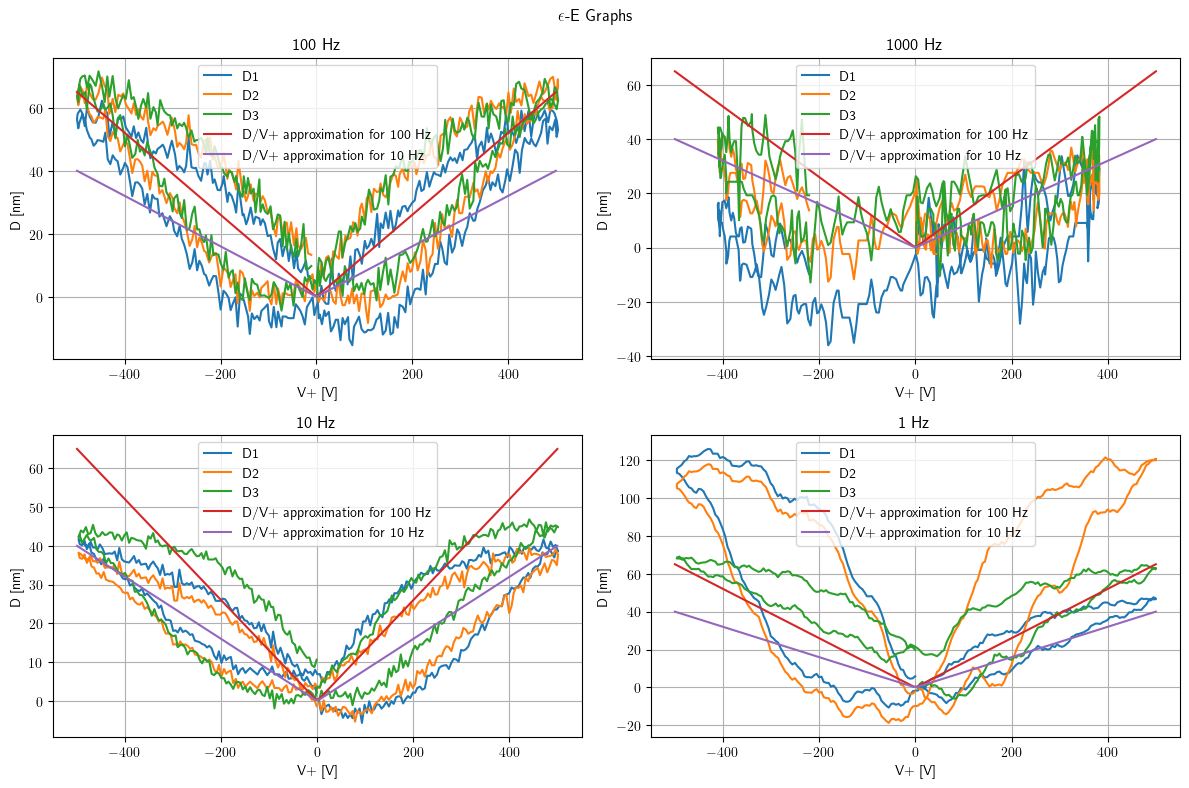

In [6]:
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize = (12,8))

ax = np.array(ax).flatten()
for i in range(len(ax)):
    data = Piezodata.measurements[i]["data"]
    parameters = Piezodata.measurements[i]["parameters"]
    ax[i].plot(data.iloc[:,1],data.iloc[:,9], label = f"{Piezodata.measurements[1]["data"].columns[9].split(" ")[0]}")
    ax[i].plot(data.iloc[:,1],data.iloc[:,10], label = f"{Piezodata.measurements[1]["data"].columns[10].split(" ")[0]}")
    ax[i].plot(data.iloc[:,1],data.iloc[:,11], label = f"{Piezodata.measurements[1]["data"].columns[11].split(" ")[0]}")
    x = np.linspace(-500,500,150)
    y = np.abs(x*0.13)
    ax[i].plot(x,y, label = "D/V+ approximation for 100 Hz")
    y = np.abs(x*0.08)
    ax[i].plot(x,y, label = "D/V+ approximation for 10 Hz")
    ax[i].grid()
    ax[i].set(title = f"{parameters.iloc[:,13].values[0]} Hz",xlabel = f"{Hysteresisdata.measurements[1]["data"].columns[1]}",ylabel = f"D [nm]")
    ax[i].legend()
fig.suptitle(r"$\epsilon$-E Graphs")
fig.tight_layout()
fig.savefig("epsilon-E Graphs",dpi = dpi_for_saving,bbox_inches='tight')
fig.show()

C:\Users\Ijslo\AppData\Local\Temp\ipykernel_15296\1914445362.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


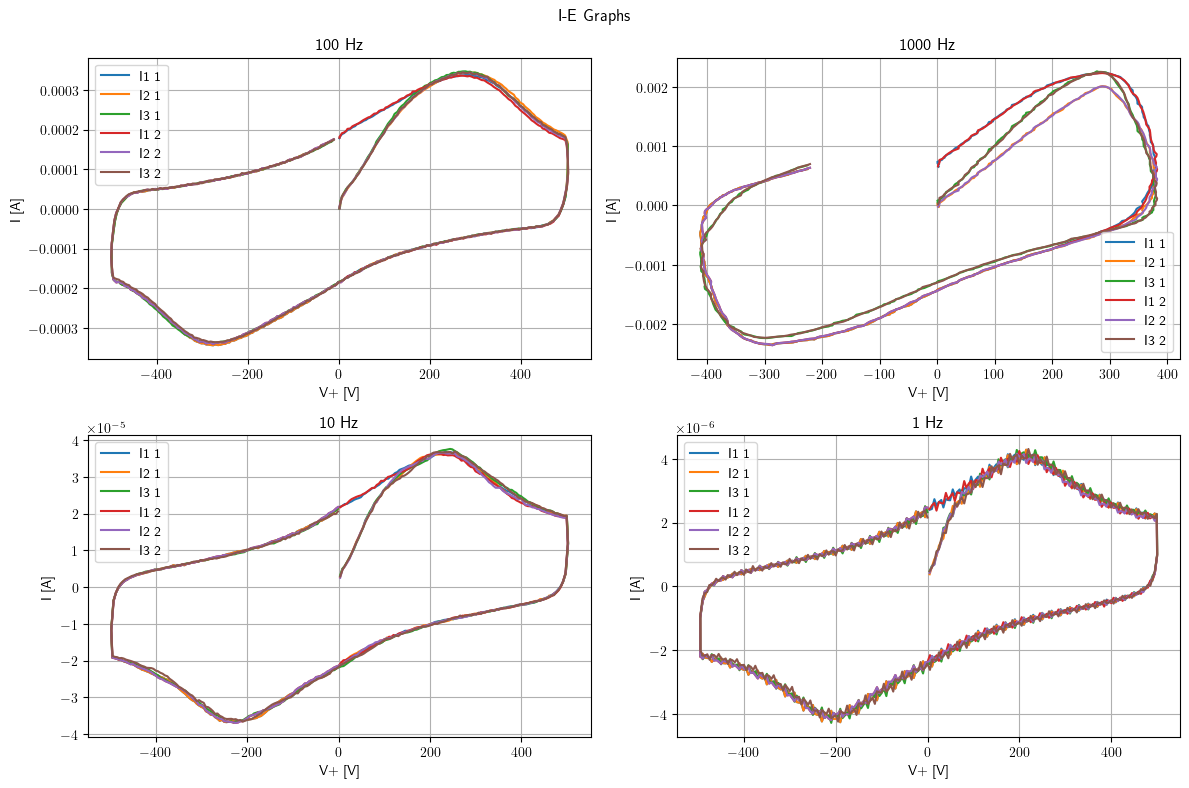

In [7]:
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize = (12,8))

ax = np.array(ax).flatten()
for i in range(len(ax)):
    data = Hysteresisdata.measurements[i]["data"]
    parameters = Hysteresisdata.measurements[i]["parameters"]
    ax[i].plot(data.iloc[:,1],data.iloc[:,3], label = f"{Hysteresisdata.measurements[1]["data"].columns[3].split(" ")[0]} 1")
    ax[i].plot(data.iloc[:,1],data.iloc[:,5], label = f"{Hysteresisdata.measurements[1]["data"].columns[5].split(" ")[0]} 1")
    ax[i].plot(data.iloc[:,1],-data.iloc[:,7], label = f"{Hysteresisdata.measurements[1]["data"].columns[7].split(" ")[0]} 1")
    ax[i].grid()
    ax[i].set(title = f"{parameters.iloc[:,11].values[0]} Hz",ylabel = f"{Hysteresisdata.measurements[1]["data"].columns[1]}",xlabel = f"I [A]")
    ax[i].legend()
for i in range(len(ax)):
    data = Piezodata.measurements[i]["data"]
    parameters = Piezodata.measurements[i]["parameters"]
    ax[i].plot(data.iloc[:,1],data.iloc[:,3], label = f"{Piezodata.measurements[1]["data"].columns[3].split(" ")[0]} 2")
    ax[i].plot(data.iloc[:,1],data.iloc[:,5], label = f"{Piezodata.measurements[1]["data"].columns[5].split(" ")[0]} 2")
    ax[i].plot(data.iloc[:,1],-data.iloc[:,7], label = f"{Piezodata.measurements[1]["data"].columns[7].split(" ")[0]} 2")
    ax[i].set(title = f"{parameters.iloc[:,13].values[0]} Hz",xlabel = f"{Hysteresisdata.measurements[1]["data"].columns[1]}",ylabel = f"I [A]")
    ax[i].legend()
fig.suptitle("I-E Graphs")
fig.tight_layout()
fig.savefig("I-E Graphs",dpi = dpi_for_saving,bbox_inches='tight')
fig.show()